# **STEP 1 : INSTALLATION AND SETUP**

In [ ]:
pip install tensorflow[and-cuda]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (

In [ ]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))


0


In [ ]:
print(tf.__version__)

2.16.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **STEP 2 : DATA PREPROCESSING**

In [61]:
# import the dataset
from google.colab import files
uploaded = files.upload()

Saving testdata.csv to testdata.csv
Saving trainingdata.csv to trainingdata.csv


In [62]:
import pandas as pd

trainingdata = pd.read_csv('/content/trainingdata.csv')


In [63]:
trainingdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-29,63.700001,64.463501,63.314751,64.378998,64.378998,49988000
1,2019-04-30,59.250000,59.640499,58.750000,59.424000,59.424000,124140000
2,2019-05-01,59.402500,59.402500,58.359001,58.403999,58.403999,52784000
3,2019-05-02,58.388000,58.709499,57.750099,58.130501,58.130501,38896000
4,2019-05-03,58.682499,59.340000,58.450001,59.270000,59.270000,39614000


In [64]:
trainingdata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2024-04-22,156.009995,159.184998,155.660004,157.949997,157.949997,17243900
1255,2024-04-23,158.589996,160.479996,157.964996,159.919998,159.919998,16115400
1256,2024-04-24,159.089996,161.389999,158.820007,161.100006,161.100006,19485700
1257,2024-04-25,153.360001,158.279999,152.768005,157.949997,157.949997,36197800
1258,2024-04-26,175.990005,176.419998,171.399994,173.690002,173.690002,55186700


In [65]:
trainingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [66]:
training_set = trainingdata.iloc[:,1:2].values

In [67]:
training_set.shape, trainingdata.shape

((1259, 1), (1259, 7))

In [68]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [69]:
training_set_scaled

array([[0.09330212],
       [0.0573701 ],
       [0.05860148],
       ...,
       [0.86353903],
       [0.81727156],
       [1.        ]])

In [76]:
import numpy as np

# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1259):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Convert x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [72]:
x_train

array([[0.09330212, 0.0573701 , 0.05860148, ..., 0.04250878, 0.0365578 ,
        0.04081716],
       [0.0573701 , 0.05860148, 0.05040978, ..., 0.0365578 , 0.04081716,
        0.03593202],
       [0.05860148, 0.05040978, 0.05278775, ..., 0.04081716, 0.03593202,
        0.03832209],
       ...,
       [0.81953244, 0.82252001, 0.75291691, ..., 0.85271909, 0.83866923,
        0.85950173],
       [0.82252001, 0.75291691, 0.7391901 , ..., 0.83866923, 0.85950173,
        0.86353903],
       [0.75291691, 0.7391901 , 0.71658117, ..., 0.85950173, 0.86353903,
        0.81727156]])

In [73]:
y_train

array([0.03593202, 0.03832209, 0.07313173, ..., 0.86353903, 0.81727156,
       1.        ])

In [74]:
x_train.shape

(1199, 60)

In [77]:
# reshaping dataset
x_train = x_train.reshape(1199, 60, 1)

In [23]:
x_train.shape

(1175, 60, 1)

Step 3: Building **LSTM**

# **Step 3: Building LSTM**

In [78]:
import tensorflow as tf

# Define an object (initialize RNN)
model = tf.keras.models.Sequential()


In [79]:
# Assuming x_train is your input data
x_train = x_train.reshape(-1, 60, 1)

# Rest of your model definition...
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60, 1)))
model.add(tf.keras.layers.Dropout(0.2))


# Second LSTM layers and dropout
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))


# Third LSTM layers and dropout
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))


# Forth LSTM layers and dropout
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))



In [80]:
#Output layer
model.add(tf.keras.layers.Dense(units=1))

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 60)            14880     
                                                                 
 dropout_22 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_25 (LSTM)              (None, 60, 60)            29040     
                                                                 
 dropout_23 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_24 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_27 (LSTM)              (None, 120)              

In [82]:
# Compile the model...
model.compile(optimizer='adam', loss='mean_squared_error')

# **Step 4 :  Training the model**

In [83]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 13s 196ms/step - loss: 0.0538
Epoch 2/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0048
Epoch 4/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0037
Epoch 10/100
38/38 [==============================] - 7s 197ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 7s 198ms/step - loss: 0.0036
Epoch 13/100

# **Step 5 : Making Predictions**

In [87]:
# Getting The Real Stock Prices of Month APRIL 2024
test_data = pd.read_csv('/content/testdata.csv')

In [88]:
test_data.shape

(20, 7)

In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [90]:
real_stock_price = test_data.iloc[:, 1:2].values

In [91]:
real_stock_price

array([[151.830002],
       [154.75    ],
       [154.919998],
       [155.080002],
       [151.679993],
       [154.014999],
       [157.350006],
       [157.880005],
       [158.339996],
       [159.404999],
       [160.279999],
       [155.639999],
       [157.190002],
       [156.925003],
       [157.75    ],
       [156.009995],
       [158.589996],
       [159.089996],
       [153.360001],
       [175.990005]])

In [92]:
real_stock_price.shape

(20, 1)

In [96]:
# Getting predicted stock prices of month APRIL 2024

# Concatination
dataset_total = pd.concat((trainingdata['Open'], test_data['Open']), axis=0)

# Stocks prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values

# Reshape (Convert into numpy array)
inputs = inputs.reshape(-1,1)

# Feature Scaling
inputs = sc.transform(inputs)

# creating a test set

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

# Convert to numpy array
X_test = np.array(X_test)

# Convert in 3D (required to Process)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Getting predicted stock price
predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)






1/1 [==============================] - 1s 691ms/step


In [98]:
print(predicted_stock_price[5]), print(real_stock_price)

[148.05672]
[[151.830002]
 [154.75    ]
 [154.919998]
 [155.080002]
 [151.679993]
 [154.014999]
 [157.350006]
 [157.880005]
 [158.339996]
 [159.404999]
 [160.279999]
 [155.639999]
 [157.190002]
 [156.925003]
 [157.75    ]
 [156.009995]
 [158.589996]
 [159.089996]
 [153.360001]
 [175.990005]]


(None, None)

# **Step 6: Visualization**

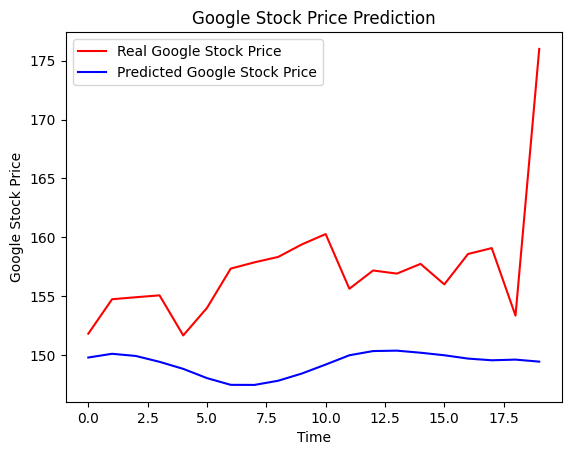

In [99]:
import matplotlib.pyplot as plt

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
